<a href="https://colab.research.google.com/github/charite-uwatwembi/Crop-Disease-AI-Classification/blob/main/crops_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
import os


# New Section

In [3]:
from google.colab import files

# Upload the Kaggle API key file (kaggle.json) that you downloaded
uploaded = files.upload()

# Move the uploaded file to the required location
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


ModuleNotFoundError: No module named 'google.colab'

In [23]:
!kaggle datasets list


ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                       Student Performance Factors                          94KB  2024-09-02 10:53:57          28009        493  1.0              
abdulszz/spotify-most-streamed-songs                          Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14          10612        139  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset   Mobile Device Usage and User Behavior Dataset        11KB  2024-09-28 20:21:12           3355         66  1.0              
thomasfranois/worlds-best-restaurants                         World's 

In [24]:
!kaggle datasets download -d moazeldsokyx/plantvillage

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/plantvillage
License(s): CC0-1.0
plantvillage.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
import zipfile
with zipfile.ZipFile('/content/plantvillage.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/plantvillage/')


In [26]:
# Install necessary libraries
!pip install tensorflow matplotlib seaborn scikit-learn


In [33]:
import os
print(os.listdir('/content/plantvillage/dataset'))



['train', 'test', 'validation']


Found 16504 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 113s 209ms/step - accuracy: 0.3974 - loss: 1.9683 - val_accuracy: 0.5372 - val_loss: 1.6744 - learning_rate: 0.0010
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 134s 200ms/step - accuracy: 0.7265 - loss: 0.8377 - val_accuracy: 0.6874 - val_loss: 1.0225 - learning_rate: 0.0010
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 102s 195ms/step - accuracy: 0.7855 - loss: 0.6433 - val_accuracy: 0.7266 - val_loss: 0.8977 - learning_rate: 0.0010
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 145s 201ms/step - accuracy: 0.8149 - loss: 0.5619 - val_accuracy: 0.7715 - val_loss: 0.7946 - learning_rate: 0.0010
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 102s 196ms/step - accuracy: 0.8218 - loss: 0.5182 - val_accuracy: 0.7386 - val_loss: 1.0312 - learning_rate: 0.0010
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 145s 202ms/step - accuracy: 0.8470 - loss: 0.4635 - val_accuracy: 0.8242 - val_loss: 0.6130 - learning_rate: 0.0010
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 141s 199ms/step - accuracy: 0.8634 

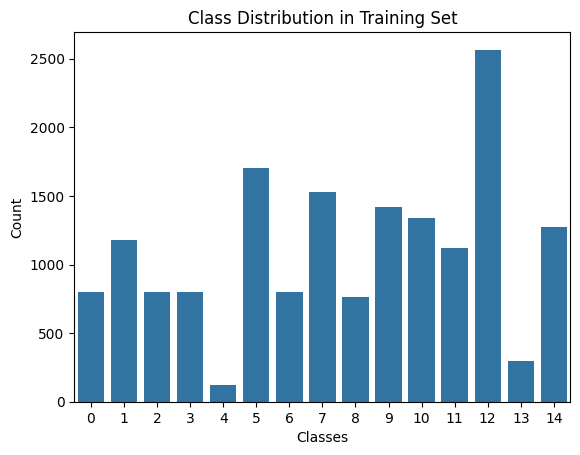

In [40]:
# Step 1: Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 2: Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize the images
    rotation_range=40,  # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill mode for new pixels
)

# Set the paths for train, validation, and test directories
train_dir = '/content/plantvillage/dataset/train'
validation_dir = '/content/plantvillage/dataset/validation'
test_dir = '/content/plantvillage/dataset/test'

# Train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Ensure this is 'categorical'
)

# Validation data generator
valid_datagen = ImageDataGenerator(rescale=1.0/255)  # Only normalize the validation images
validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Ensure this is 'categorical'
)

# Define test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling is typically applied to test data
# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Change this to 'binary' if using binary classification
)

# Define image dimensions
image_height = 150  # Adjust this based on your input size
image_width = 150   # Adjust this based on your input size
num_channels = 3    # 3 for RGB images; use 1 for grayscale images

# Step 3: Model Architecture
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(15, activation='softmax'))  # Change to 'sigmoid' if using binary classification

# Step 4: Compile the Model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use this for multi-class classification
    metrics=['accuracy']
)

# Step 5: Early Stopping and Learning Rate Adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Step 6: Train the Model
history1 = model1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Increase for better training
    callbacks=[early_stopping, reduce_lr]
)

# Step 7: Class Distribution Check
train_classes = train_generator.classes
val_classes = validation_generator.classes

print("Train class distribution:", pd.Series(train_classes).value_counts())
print("Validation class distribution:", pd.Series(val_classes).value_counts())

# Step 8: Data Exploration and Visualization (if needed)
# Example of class distribution visualization
sns.countplot(x=train_classes)
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()
